<a href="https://colab.research.google.com/github/pevening/study_code/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8A%A4%ED%84%B0%EB%94%94_3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#1.데이터를 읽어들이고 확인하자

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
# use_log -> 센터의 이용 이력 데이터, 2018/04~2019/03
# customer_master -> 2019/03 말 시점 회원 데이터
# class_master -> 회원 구분(종일, 주간, 야간)
# campaign_master -> 행사 구분(입회비 할인 등)

In [36]:
uselog = pd.read_csv('/content/gdrive/MyDrive/데이터분석 스터디/3장/use_log.csv')
customer = pd.read_csv('/content/gdrive/MyDrive/데이터분석 스터디/3장/customer_master.csv')
class_master = pd.read_csv('/content/gdrive/MyDrive/데이터분석 스터디/3장/class_master.csv')
campaign_master = pd.read_csv('/content/gdrive/MyDrive/데이터분석 스터디/3장/campaign_master.csv')

In [37]:
print(len(uselog))
uselog

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [38]:
print(len(customer))
customer

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0


In [39]:
print(len(class_master))
class_master

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [40]:
print(len(campaign_master))
campaign_master

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [41]:
# 어떤 데이터를 기준으로 합치고 가공할 것인지 생각!
# 데이터 수가 적은것을 메인으로 해볼까 ?

#2.고객 데이터를 가공하자

In [42]:
# customer을 중심으로 옆으로 붙이자 ! 조인 키 찾고, 조인 방식 선택

customer_join = pd.merge(customer,class_master, on = 'class', how = 'left')
customer_join = pd.merge(customer_join, campaign_master, on = 'campaign_id', how = 'left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [43]:
# 데이터 개수 안맞는것끼리 조인 시 결측치 들어갈 수 있으니 끝나고 꼭 확인 !

customer_join.isnull().sum()
# end_date 에만 결측치 있는 것 확인 -> 아직 탈퇴하지 않은 회원이 2842명인것

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

# 3.고객 데이터를 집계하자

In [44]:
# 무엇을 기준으로 그룹화 해볼건지 생각 !
# 회원 구분, 행사 구분, 남녀 구분, 탈퇴 여부 등

In [45]:
# 회원 구분별
customer_join.groupby('class_name').count()['customer_id']

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [46]:
# 행사 구분별
customer_join.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [47]:
# 성별 별
customer_join.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [48]:
# 탈퇴 여부 별
customer_join.groupby('is_deleted').count()['customer_id']
# 2019년 3월 현재 가입회원 2842명, 탈퇴 1350명

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [49]:
# 2018/04/01 부터 2019/03/31 까지 가입한 인원 집계해보자
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join.loc[customer_join['start_date']> pd.to_datetime('20180401')]
customer_start
# 이 기간동안 가입인원 1361 명

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2831,HI195873,XXX,C01,F,2018-04-02,2018-08-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2832,TS322485,XX,C03,F,2018-04-02,2018-08-31 00:00:00,CA3,1,2_야간,6000,1_입회비무료
2833,IK552971,XXXXX,C02,F,2018-04-02,2018-08-31 00:00:00,CA3,1,1_주간,7500,1_입회비무료
2834,PL000560,XXX,C01,M,2018-04-02,2018-07-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2835,HD218970,XXXXX,C01,F,2018-04-02,2018-11-30 00:00:00,CA3,1,0_종일,10500,1_입회비무료
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반


#4.최신 고객 데이터를 집계하자

In [50]:
# 가장 최근 월(2019/03) 고객 데이터 집계, 현재 고객의 전체 모습 파악

In [51]:
# 2019/03 월에 탈퇴한 고객과 재적중인 고객 추출

customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) |
                                   (customer_join['end_date'].isna())]
print(len(customer_newer))
customer_newer['end_date'].unique()

# unique 로 살펴보면 NaT 즉 탈퇴하지 않은 고객, 2019년 3월에 탈퇴한 고객만 추출됨
# end_date 살펴보면 각 달의 마지막 날에 해당하는 날짜로 표기된 것 알 수 있음 따라서 customer_newer에는 아직 탈퇴하지 않은 고객과 / 19년 3월에 탈퇴한 고객만 있는 것

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [52]:
# 그룹화하여 파악해보자 ( 회원 구분, 켐페인 구분, 성별 )

customer_newer.groupby('class_name').count()['customer_id']

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [53]:
customer_newer.groupby("campaign_name").count()['customer_id']

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [54]:
customer_newer.groupby('gender').count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [55]:
# 결과 해석
# 회원 구분, 성별 에서는 전체와 큰 차이 보이지 않음, 켐페인 구분으로는 차이를 보임

# 5.이용 이력 데이터를 집계하자

In [56]:
# 이용 이력 데이터를 가지고 다양한 기초통계량 확인 및 여러 변수 추가

In [57]:
# 고객마다의 월 이용 횟수 집계
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['연월','customer_id'],as_index = False).count()
uselog_months.rename(columns={'log_id':'count'},inplace=True)
del uselog_months['usedate']
uselog_months

# 연월, customer_id를 기준으로 그룹화
# 삭제할때 del 사용해서 할수도 있구나 ..
# as_index -> 그룹을 인덱스로 지정할것인지

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [58]:
# 고객별 기초통계량 집계 ( 월 이용 횟수의 평균, 중앙값, 최대, 최소)

uselog_customer = uselog_months.groupby('customer_id').agg(['mean','median','max','min'])['count']
uselog_customer = uselog_customer.reset_index(drop=False)
# customer_id 가 인덱스로 들어가있기 때문에 칼럼으로 변경하는 코드

uselog_customer

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


#6.이용 이력 데이터로부터 정기 이용 플래그를 작성하자

In [59]:
# 지속 요소인 습관을 바탕으로 정기적으로 센터를 이용하는 고객을 특정해보자 (매주 같은 요일에 왔는지)

uselog['weekday'] = uselog['usedate'].dt.weekday
# dt.weekday -> 0:월 1:화 2:수 ...
uselog_weekday = uselog.groupby(['customer_id','연월','weekday'],as_index = False).count()[['customer_id','연월','weekday','log_id']]
uselog_weekday.rename(columns = {'log_id':'count'},inplace=True)
uselog_weekday.head(15)

# 결과 보면 고객별, 연월별, 요일별로 그룹화되어있는 것을 볼 수 있음
# 고객별로 몇년 몇월 무슨요일에 몇번 방문했는지
# ex> AS002855 고객은 2018년 5월에 수요일에 1번 금요일에 4번 방문함

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
5,AS002855,201807,5,4
6,AS002855,201808,0,1
7,AS002855,201808,3,1
8,AS002855,201808,6,1
9,AS002855,201809,1,1


In [60]:
# 요일별 방문횟수 최대값이 4인 경우 정기적 방문이라고 보고 플래그 지정

uselog_weekday = uselog_weekday.groupby('customer_id',as_index = False).max()[['customer_id','count']]
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']<4,1)
uselog_weekday
# 요일별 4회 이상 온 고객 -> 1 / 아닌 고객은 0


,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


#7.고객 데이터와 이용 이력 데이터를 결합하자

In [61]:
customer_join = pd.merge(customer_join,uselog_customer, on='customer_id',how='left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id','routine_flg']],on='customer_id',how='left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0


In [64]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

#8.회원 기간을 계산하자

In [77]:
# start_date 와 end_date 차이인 회원 기간을 계산하여 칼럼에 추가!
# 아직 탈퇴하지 않은 회원은 end_date 가 결측치, 계산 불가 -> 2019/04/30으로 채워 기간 계산

from dateutil.relativedelta import relativedelta

customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join['membership_period'] = 0
for i in range(len(customer_join)) : 
  delta = relativedelta(customer_join['calc_date'].iloc[i],customer_join['start_date'].iloc[i])
  customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months
customer_join.head()

# relativedelta -> 날짜 비교 함수

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


#9.고객 행동의 각종 통계량을 파악하자

In [79]:
customer_join[['mean','median','max','min']].describe()

# 표시된 값은 매월 평균 이용 횟수의 평균 -> 한 사람당 매월 평균 이용 횟수

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [80]:
customer_join.groupby('routine_flg').count()['customer_id']

# 루틴이 있는 즉 정기적으로 이용하는 회원 수 많음

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

Text(0.5, 1.0, '회원 기간')

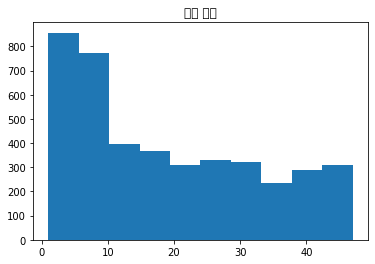

In [91]:
# 시각화를 통해 회원 기간의 분포 살펴보자

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc

rc('font', family='AppleGothic') 		
plt.rcParams['axes.unicode_minus'] = False 

plt.hist(customer_join['membership_period'])
plt.title('회원 기간')

# 10개월 이내인 고객이 많음 -> 짧은 시간에 고객이 빠져나간다

#10.탈퇴 회원과 지속 회원의 차이를 파악하자

In [94]:
# 탈퇴 회원은 어떤 특징을 갖는지 찾아보자

customer_end = customer_join.loc[customer_join['is_deleted']==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [95]:
customer_stay = customer_join[customer_join['is_deleted']==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [96]:
# 매월 이용 횟수 부분에서 탈퇴 회원은 지속 회원보다 모두 적은 값을 보여줌
# 주기적 방문의 경우 지속 회원은 거의 1에 가까운 값 -> 거의 다 주기적으로 방문
# 탈퇴 회원은 0.45 즉 절반정도만 주기적 방문

In [97]:
customer_join.to_csv('customer_join.csv',index=False)